## Import libraries and data

In [1]:
# Dataset link -> https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('archive (1)/Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## Explore the data

In [4]:
df.shape

(240, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [6]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [7]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

In [8]:
Columns = ['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method']

## Clean the data

In [9]:
df.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [10]:
df.dtypes

Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold            int64
Unit Price          float64
Total Revenue       float64
Region               object
Payment Method       object
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['month'] = df['Date'].dt.month

## Findings

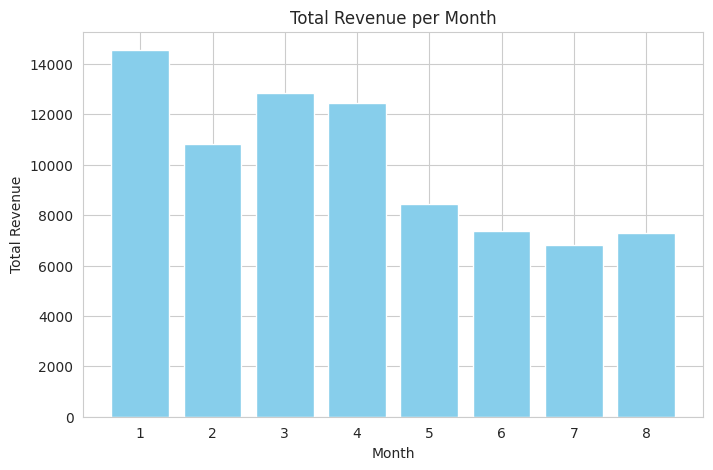

In [14]:
month_revenue = df.groupby('month')['Total Revenue'].sum()
plt.figure(figsize=(8, 5))
plt.bar(month_revenue.index, month_revenue.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Month')
plt.show()

#### The months have high sales are Jan, Mar, April

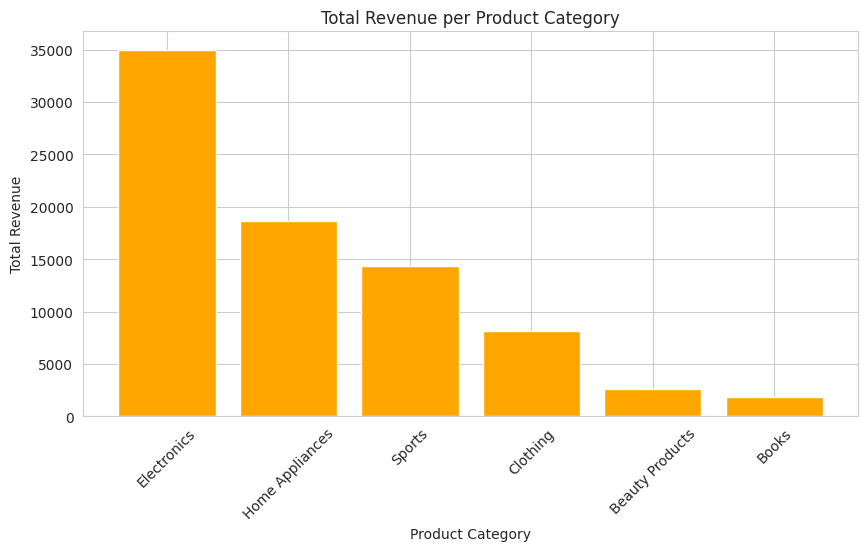

In [15]:
category_orders = df.groupby('Product Category')['Total Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(category_orders.index, category_orders.values, color='orange')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Product Category')
plt.xticks(rotation=45)
plt.show()

#### Electronics is the best category in revenue

In [16]:
region_orders = df.groupby('Region')['Transaction ID'].count()
region_orders

Region
Asia             80
Europe           80
North America    80
Name: Transaction ID, dtype: int64

#### Same orders from different regions

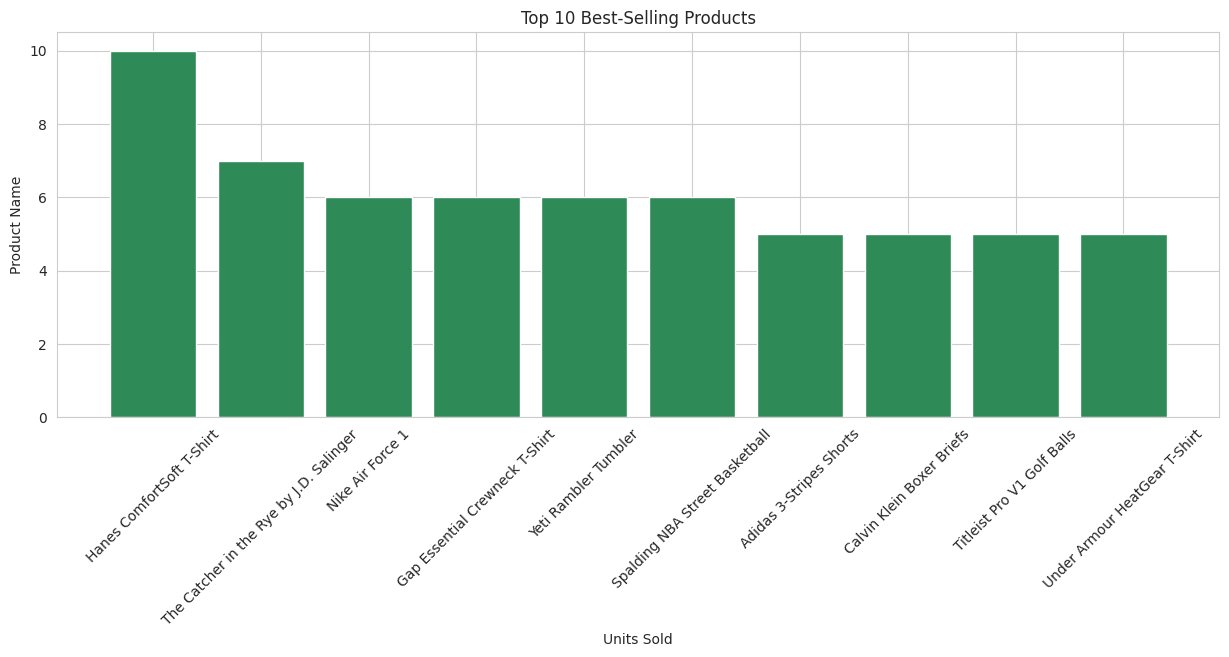

In [17]:
product_units = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
top10 = product_units.head(10)
plt.bar(top10.index, top10.values, color='seagreen')
plt.xlabel('Units Sold')
plt.ylabel('Product Name')
plt.xticks(rotation=45)
plt.title('Top 10 Best-Selling Products')
plt.show()


In [18]:
# Average revenue
df['Total Revenue'].mean()

np.float64(335.699375)

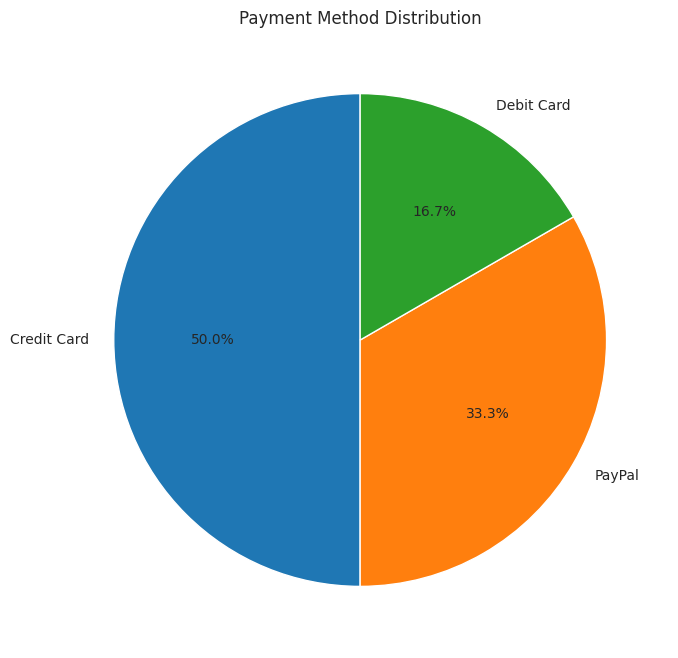

In [19]:
payment_method = df['Payment Method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.show()